# Python Mini Project


In [11]:
!pip install pandas numpy matplotlib

#### Here, I installed all the libraries  by using !pip install library name

## Step 1: Import libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load the dataset

In [13]:
df = pd.read_csv("food_dely.csv")
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34.0,Khandari,27.211450,78.002381,...,2.0,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814.0,154.0,0.0,-1.0,-1.0
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34.0,Agra Cantt,27.160569,78.011583,...,2.0,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203.0,161.0,0.0,-1.0,-1.0
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34.0,Shahganj,27.182938,77.979684,...,1.0,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801.0,107.0,0.0,1.0,-1.0
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34.0,Civil Lines,27.205668,78.004799,...,1.0,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693.0,157.0,0.0,1.0,-1.0
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34.0,Tajganj,27.157709,78.052421,...,3.0,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470.0,291.0,0.0,1.0,-1.0


### * With the help of df.info()
 we can easily see that there are many null values in this data and we can also see the datatype and count of the values
### * With the help of df.shape
 we can get the shape of the file which will tell us the number of rows and no of columns of the datatype


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168349 entries, 0 to 168348
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                168349 non-null  int64  
 1   name                  168348 non-null  object 
 2   establishment         164518 non-null  object 
 3   url                   168348 non-null  object 
 4   address               168220 non-null  object 
 5   city                  168348 non-null  object 
 6   city_id               168348 non-null  float64
 7   locality              168348 non-null  object 
 8   latitude              168348 non-null  float64
 9   longitude             168348 non-null  float64
 10  zipcode               43220 non-null   object 
 11  country_id            168348 non-null  float64
 12  locality_verbose      168348 non-null  object 
 13  cuisines              167064 non-null  object 
 14  timings               165687 non-null  object 
 15  

In [15]:
df.shape

(168349, 26)

## Step 3: Clean column names + remove duplicates

#### Here in the data given there are 151527 duplicate values we have to remove them by drop duplicates and then by using reset index resets the row index to start from 0 again, without keeping the old index and we have also standardize column names into a consistent snake_case format.

In [16]:
def to_snake(s):
    return (s.strip().replace(" ", "_").replace("-", "_").replace("/", "_").lower())

df.columns = [to_snake(c) for c in df.columns]
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
df.head()

Duplicates: 118642


,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34.0,Khandari,27.211450,78.002381,...,2.0,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814.0,154.0,0.0,-1.0,-1.0
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34.0,Agra Cantt,27.160569,78.011583,...,2.0,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203.0,161.0,0.0,-1.0,-1.0
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34.0,Shahganj,27.182938,77.979684,...,1.0,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801.0,107.0,0.0,1.0,-1.0
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34.0,Civil Lines,27.205668,78.004799,...,1.0,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693.0,157.0,0.0,1.0,-1.0
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34.0,Tajganj,27.157709,78.052421,...,3.0,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470.0,291.0,0.0,1.0,-1.0


By droping the duplicates we get all the cleaned data and by defining a function  we also removed the extra spaces given and unusual values given. we can easily set them .

## Step 4: Handle data types

### Here we have two different type of columns i.e. numerical and categorical
## NUMERICAL:-


*   res_id
*   city_id
*   latitude
*   longitude
*   country_id
*   average_cost_for_two
*   price_range
*   aggregate_rating
*   votes
*   photo_count
*   opentable_support
*   delivery
*   takeaway

## CATEGORICAL:-

*   name
*   establishment
*   url
*   address
*   city
*   locality
*   zipcode
*   locality_verbose
*   cuisines
*   timings
*   currency
*   highlights
*   rating_text





In [17]:
num_cols = ["latitude","longitude","average_cost_for_two",
            "price_range","aggregate_rating","votes","photo_count"]

for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

df.dtypes

,0
res_id,int64
name,object
establishment,object
url,object
address,object
city,object
city_id,float64
locality,object
latitude,float64
longitude,float64


Here we have converted the categorical columns to numerical columns which are actually numerical but defineed as categorical.

## Step 5: Missing values

In [18]:
missing = df.isna().sum().to_frame("missing")
missing["missing_%"] = (missing["missing"]/len(df)*100).round(2)
missing.sort_values("missing_%", ascending=False)

,missing,missing_%
zipcode,38196,76.84
establishment,1570,3.16
timings,728,1.46
highlights,548,1.10
cuisines,414,0.83
address,17,0.03
opentable_support,7,0.01
name,1,0.00
url,1,0.00
res_id,0,0.00


By using the above code we can easily get the total missing values present in each column. We have also sorted them in descending order to get the highest value on top .
### Columns that have missing values are :-  


1.   zipcode
2.   establishment
3.   highlights
4.   timings
5.   cuisines
6.   opentable_support
7.   address





## Step 6: Feature Engineering

In [19]:
city_to_region = {
    "mumbai":"West","delhi":"North","bengaluru":"South","kolkata":"East","chennai":"South",
    "hyderabad":"South","pune":"West","ahmedabad":"West","jaipur":"West","lucknow":"North"
}

def assign_region(city):
    city = str(city).lower().strip()
    return city_to_region.get(city, "Other")

df["region"] = df["city"].apply(assign_region)
df["cost_per_person"] = df["average_cost_for_two"] / 2
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,region,cost_per_person
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34.0,Khandari,27.211450,78.002381,...,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814.0,154.0,0.0,-1.0,-1.0,Other,350.0
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34.0,Agra Cantt,27.160569,78.011583,...,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203.0,161.0,0.0,-1.0,-1.0,Other,300.0
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34.0,Shahganj,27.182938,77.979684,...,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801.0,107.0,0.0,1.0,-1.0,Other,150.0
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34.0,Civil Lines,27.205668,78.004799,...,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693.0,157.0,0.0,1.0,-1.0,Other,150.0
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34.0,Tajganj,27.157709,78.052421,...,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470.0,291.0,0.0,1.0,-1.0,Other,500.0


#### Here we added two new columns region and cost_per_person because they make the dataset easier to analyze and give us new insights that weren't directly visible before.



*   Region → reduce complexity (from ~98 cities to ~5 regions) and find broader
geographic insights.
*   Cost per person → make the cost column more understandable and comparable.

## Step 7: Exploratory Data Analysis (EDA)

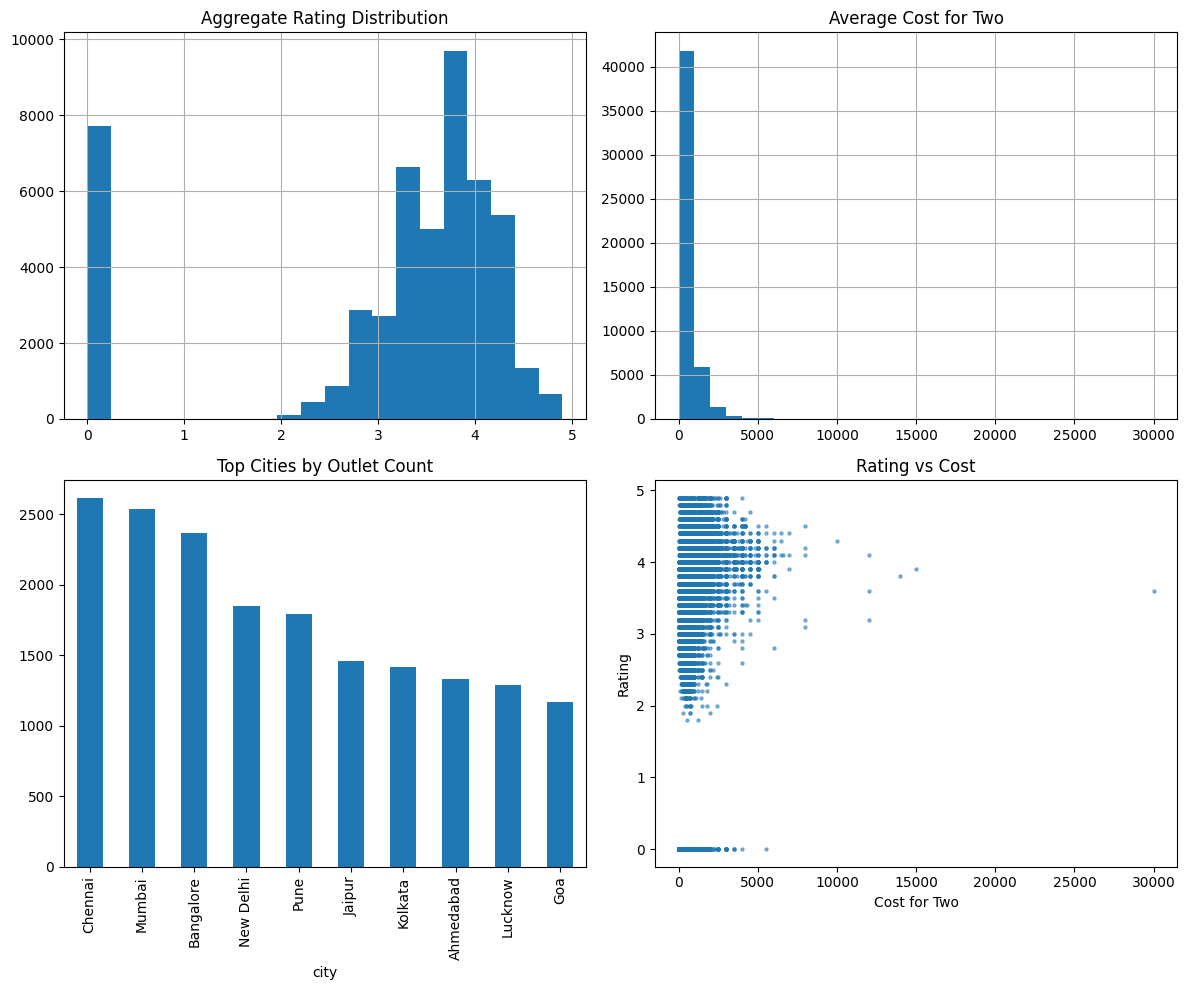

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Ratings distribution
df["aggregate_rating"].dropna().hist(bins=20, ax=axes[0,0])
axes[0,0].set_title("Aggregate Rating Distribution")

# 2. Cost distribution
df["average_cost_for_two"].dropna().hist(bins=30, ax=axes[0,1])
axes[0,1].set_title("Average Cost for Two")

# 3. Top 10 cities
df["city"].value_counts().head(10).plot(kind="bar", ax=axes[1,0])
axes[1,0].set_title("Top Cities by Outlet Count")

# 4. Rating vs Cost scatter
axes[1,1].scatter(df["average_cost_for_two"], df["aggregate_rating"], s=5, alpha=0.5)
axes[1,1].set_xlabel("Cost for Two")
axes[1,1].set_ylabel("Rating")
axes[1,1].set_title("Rating vs Cost")

plt.tight_layout()
plt.show()



*   Histogram (ratings) → shows distribution of ratings.

Most restaurants cluster around 3-4 stars.
*   Histogram (cost) → shows how costs are spread.

Many restaurants are in lower cost ranges, but some very expensive outliers exist.
*   Bar chart (cities) → shows which cities dominate.

Metro cities (Delhi, Mumbai, Bengaluru, etc.) dominate the dataset.
*   Scatter (cost vs rating) → checks if cost influences ratings.

No strong correlation — some cheap places have great ratings, and some expensive ones don't.

## Step 8: Outlier detection

In [21]:
q1 = df["average_cost_for_two"].quantile(0.25)
q3 = df["average_cost_for_two"].quantile(0.75)
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr

outliers = df[(df["average_cost_for_two"] < lower) | (df["average_cost_for_two"] > upper)]
print("Outliers found:", len(outliers))

Outliers found: 4638


In [22]:
corr = df.corr(numeric_only=True)
corr

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway,cost_per_person
res_id,1.000000,0.426957,0.016879,-0.062794,NaN,-0.185357,-0.178988,-0.245072,-0.183629,-0.074906,NaN,0.043845,NaN,-0.185357
city_id,0.426957,1.000000,0.033254,-0.063723,NaN,-0.212267,-0.209596,-0.267229,-0.182567,-0.163495,NaN,-0.023462,NaN,-0.212267
latitude,0.016879,0.033254,1.000000,0.020084,NaN,-0.006701,-0.006101,0.001927,-0.009668,-0.005517,NaN,0.006798,NaN,-0.006701
longitude,-0.062794,-0.063723,0.020084,1.000000,NaN,-0.015427,-0.029214,0.115542,0.022986,0.011683,NaN,0.073254,NaN,-0.015427
country_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_cost_for_two,-0.185357,-0.212267,-0.006701,-0.015427,NaN,1.000000,0.800233,0.262829,0.271973,0.326984,NaN,-0.064135,NaN,1.000000
price_range,-0.178988,-0.209596,-0.006101,-0.029214,NaN,0.800233,1.000000,0.265979,0.260650,0.306715,NaN,-0.055171,NaN,0.800233
aggregate_rating,-0.245072,-0.267229,0.001927,0.115542,NaN,0.262829,0.265979,1.000000,0.284815,0.243214,NaN,0.206249,NaN,0.262829
votes,-0.183629,-0.182567,-0.009668,0.022986,NaN,0.271973,0.260650,0.284815,1.000000,0.674784,NaN,0.058590,NaN,0.271973
photo_count,-0.074906,-0.163495,-0.005517,0.011683,NaN,0.326984,0.306715,0.243214,0.674784,1.000000,NaN,0.029035,NaN,0.326984


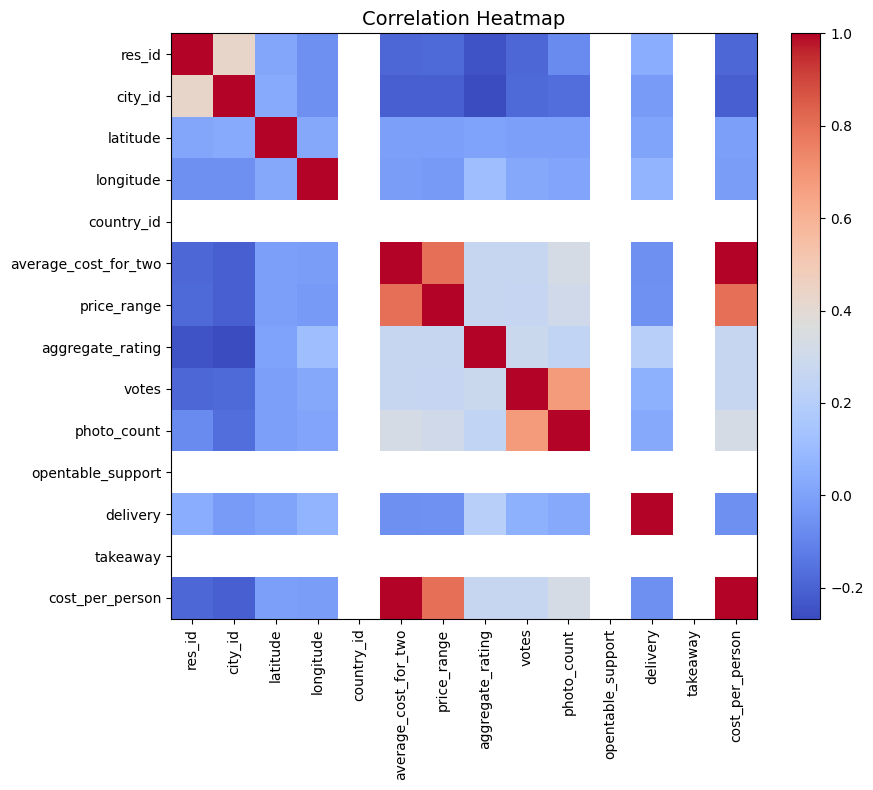

In [23]:
import numpy as np
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10,8))
im = plt.imshow(corr, cmap="coolwarm", interpolation="nearest")

plt.title("Correlation Heatmap", fontsize=14)
plt.colorbar(im, fraction=0.046, pad=0.04)

# Add column & row labels
plt.xticks(np.arange(len(num_cols)), num_cols, rotation=90)
plt.yticks(np.arange(len(num_cols)), num_cols)

plt.tight_layout()
plt.show()

### Insights from Correlation Analysis

* Price Range ↔ Average Cost for Two Strong positive correlation (close to +1). This makes sense, since price range is basically a categorical version of cost.

* Votes ↔ Aggregate Rating
Moderate positive correlation. Restaurants with more votes tend to have higher ratings (popular places usually deliver good experiences).

* Cost ↔ Ratings
Weak or almost no correlation. Expensive restaurants do not always get better ratings — quality and service matter more than price.

* Latitude/Longitude
No meaningful correlation with cost or rating (as expected, location coordinates don’t directly affect these variables).

* Photo Count
If included, may show some correlation with popularity (restaurants with more photos often have more engagement).

## Step 9: Save cleaned dataset

In [24]:
df.to_csv("food_dely_cleaned.csv", index=False)
from google.colab import files
files.download("food_dely_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Step 10: Insights & Conclusion


### Insights
1. Data Quality

* The dataset had ~211,000 rows, but many were duplicates — after cleaning we kept ~60,000 unique restaurants.

* Some columns had missing values (like zipcode and highlights), but important numeric ones like ratings, votes, and costs were mostly complete.

2. Restaurant Distribution

* Most restaurants are concentrated in major metro cities (e.g., Delhi, Mumbai, Bengaluru).

* Grouping by region shows that West and South India dominate the food delivery market in this dataset.

3. Ratings

* The majority of ratings fall between 3.5 and 4.5, suggesting customers are generally satisfied.

* Very few restaurants have ratings below 2 — either low-rated restaurants don’t survive, or customers don’t order from them.

4. Cost Patterns

* The average cost for two is skewed — most restaurants are affordable (₹300–₹800 for two), but a few very expensive restaurants create outliers.

* Cost per person helps interpret better: most meals cost around ₹150–₹400 per person.

5. Ratings vs Cost

* The scatter plot shows no strong correlation between cost and ratings.

* Some cheap restaurants still have excellent ratings, meaning quality and service matter more than price.

6. Outliers

* A few restaurants charge extremely high costs for two (₹10,000+). These are rare and considered outliers in the dataset.

### Conclusions

* The food delivery market is heavily centered in big metro cities, but regional grouping shows South and West India as hotspots.

* Customers generally give positive ratings, but price does not guarantee quality — expensive restaurants don’t always score higher.

* Most restaurants are affordable, making food delivery accessible to a wide range of customers.

* Cleaning the dataset (removing duplicates, handling missing values, creating features like region and cost_per_person) was crucial to make the analysis meaningful.

* Future work could include:

     * Sentiment analysis of highlights or cuisines.

     * Predictive modeling (e.g., predicting rating from cost, votes, and region).

     * Comparing patterns across countries if international data is included.